#  PART A - II - Build a CNN ensemble containing a maximum of 10 base learners.  
 

## Note

### Before running this, create a directory called 'weights' in the same directory of this code

In [16]:

import numpy as np
import random
import h5py
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.layers import Dense, Dropout,Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import SGD
from keras.callbacks import ModelCheckpoint
from keras import Sequential
from sklearn.metrics import accuracy_score


In [2]:
print(tf.__version__)

2.1.0


In [3]:


def loadData():
    with h5py.File('data1.h5','r') as hf: 
        trainX = np.array(hf.get('trainX')) 
        trainY = np.array(hf.get('trainY')) 
        valX = np.array(hf.get('valX')) 
        valY = np.array(hf.get('valY')) 
        print (trainX.shape,trainY.shape) 
        print (valX.shape,valY.shape)
    return trainX, trainY, valX, valY 



In [4]:

"""Base Learner 1 """
def model_1(class_label, model_input):
    
    model = Sequential()
    # Block 1
    model.add(Conv2D(filters = 16, kernel_size = (3,3),padding = 'Same',activation ='relu', input_shape = model_input))
    model.add(MaxPooling2D(pool_size=(2,2)))

    # Block 2
    model.add(Conv2D(filters = 32, kernel_size = (3,3),padding = 'Same',activation ='relu'))
    model.add(Conv2D(filters =64, kernel_size = (3,3),padding = 'Same',activation ='relu'))
    model.add(Conv2D(filters =96, kernel_size = (3,3),padding = 'Same',activation ='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))

    # Block 3
    model.add(Conv2D(filters =128, kernel_size = (3,3),padding = 'Same',activation ='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))

    # Final Fully connected Layer
    model.add(Flatten())
    model.add(Dense(32, activation = "relu"))
    model.add(Dense(class_label, activation = "softmax"))
    return model

In [5]:
"""Base Learner 2 """

def model_2(class_label, model_input):
    
    model = Sequential()
    # Block 1
    model.add(Conv2D(filters = 16, kernel_size = (5,5),padding = 'Same',activation ='relu', input_shape = model_input))
    model.add(MaxPooling2D(pool_size=(2,2)))

    # Block 2
    model.add(Conv2D(filters = 32, kernel_size = (3,3),padding = 'Same',activation ='relu'))
    model.add(Conv2D(filters =64, kernel_size = (3,3),padding = 'Same',activation ='relu'))
    model.add(Conv2D(filters =96, kernel_size = (3,3),padding = 'Same',activation ='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))

    #  Block 3
    model.add(Conv2D(filters =128, kernel_size = (1,1),padding = 'Same',activation ='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))

    # Block 4
    model.add(Conv2D(filters =32, kernel_size = (3,3),padding = 'Same',activation ='relu'))
    model.add(Conv2D(filters =64, kernel_size = (3,3),padding = 'Same',activation ='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))

    # Block 5
    model.add(Conv2D(filters =512, kernel_size = (1,1),padding = 'Same',activation ='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))

    # Final Fully Connected Layer
    model.add(Flatten())
    model.add(Dense(64, activation = "relu"))
    model.add(Dropout(0.4))
    model.add(Dense(class_label, activation = "softmax"))
    return model

In [6]:

"""Base Learner 3 """
def model_3(class_label, model_input): 
    model = Sequential()
    # Block 1
    model.add(Conv2D(filters = 16, kernel_size = (5,5),padding = 'Same',activation ='relu', input_shape = model_input))
    model.add(MaxPooling2D(pool_size=(2,2)))

    # Block 2
    model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',activation ='relu'))
    model.add(Conv2D(filters =32, kernel_size = (3,3),padding = 'Same',activation ='relu'))
    model.add(Conv2D(filters =64, kernel_size = (3,3),padding = 'Same',activation ='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))

    # Block 3
    model.add(Conv2D(filters =64, kernel_size = (3,3),padding = 'Same',activation ='relu'))
    model.add(Conv2D(filters =64, kernel_size = (3,3),padding = 'Same',activation ='relu'))
    model.add(Conv2D(filters =96, kernel_size = (3,3),padding = 'Same',activation ='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    
    # Block 4
    model.add(Conv2D(filters =96, kernel_size = (3,3),padding = 'Same',activation ='relu'))
    model.add(Conv2D(filters =128, kernel_size = (3,3),padding = 'Same',activation ='relu'))
    model.add(Conv2D(filters =128, kernel_size = (3,3),padding = 'Same',activation ='relu'))
    model.add(Conv2D(filters =512, kernel_size = (3,3),padding = 'Same',activation ='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.25))

    # Final Fully Connected Layer
    model.add(Flatten())
    model.add(Dense(128, activation='tanh'))
    model.add(Dropout(0.5)) 
    model.add(Dense(class_label, activation = "softmax"))
    return model


In [7]:


def model_4(class_label, model_input):

    
    model = Sequential()
    # Block 1
    model.add(Conv2D(filters = 16, kernel_size = (5,5),padding = 'Same',activation ='relu', input_shape = model_input))
    model.add(MaxPooling2D(pool_size=(2,2)))

    # Block 2
    model.add(Conv2D(filters = 32, kernel_size = (1,1),padding = 'Same',activation ='relu'))
    model.add(Conv2D(filters =64, kernel_size = (1,1),padding = 'Same',activation ='relu'))
    model.add(Conv2D(filters =96, kernel_size = (3,3),padding = 'Same',activation ='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))

    # Block 3
    model.add(Conv2D(filters =128, kernel_size = (3,3),padding = 'Same',activation ='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))

    # Block 4
    model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',activation ='relu'))
    model.add(Conv2D(filters =32, kernel_size = (3,3),padding = 'Same',activation ='relu'))
    model.add(Conv2D(filters =64, kernel_size = (3,3),padding = 'Same',activation ='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))

    # Block 5
    model.add(Conv2D(filters =64, kernel_size = (3,3),padding = 'Same',activation ='relu'))
    model.add(Conv2D(filters =64, kernel_size = (3,3),padding = 'Same',activation ='relu'))
    model.add(Conv2D(filters =96, kernel_size = (3,3),padding = 'Same',activation ='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    
    # Block 6
    model.add(Conv2D(filters =96, kernel_size = (3,3),padding = 'Same',activation ='relu'))
    model.add(Conv2D(filters =128, kernel_size = (3,3),padding = 'Same',activation ='relu'))
    model.add(Conv2D(filters =128, kernel_size = (3,3),padding = 'Same',activation ='relu'))
    model.add(Conv2D(filters =512, kernel_size = (3,3),padding = 'Same',activation ='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.25))

    # Final Fully Connected Layer
    model.add(Flatten())
    model.add(Dense(256, activation = "relu"))
    model.add(Dropout(0.5))
    model.add(Dense(class_label, activation = "softmax"))
    return model


In [8]:
""" Plot the Performance of Each Base Learner """

def plot_history(history, model_name):

    plt.style.use('ggplot')
    plt.figure()
    plt.plot(np.arange(0, NUM_EPOCHS), history.history['loss'], label="train_loss")
    plt.plot(np.arange(0, NUM_EPOCHS), history.history['val_loss'], label="val_loss")
    plt.plot(np.arange(0, NUM_EPOCHS), history.history['accuracy'], label="train_acc")
    plt.plot(np.arange(0, NUM_EPOCHS), history.history['val_accuracy'], label="val_acc")
    plt.title("Train/Val: loss and accuracy \n"+model_name)
    plt.xlabel("EPOCH")
    plt.ylabel("Loss/Accuracy")
    plt.legend()
    plt.savefig(model_name+"_loss_acc_curves.png")



In [26]:

""" Compile and fit the model with check points every improvement in validation loss """
def compile_model(model, name, NUM_EPOCHS,trainX = trainX,trainY = trainX):
    
    model.compile(optimizer=SGD(lr=0.01), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    filepath = "weights/"+ name+".h5"
    checkpoint = ModelCheckpoint(filepath, monitor="val_loss", mode="min", save_best_only=True, verbose=1)
    history = model.fit(x = trainX, y = trainY, batch_size = 32, epochs = NUM_EPOCHS,callbacks=[checkpoint], validation_data = (valX, valY))
    plot_history(history, name)
    return filepath



In [10]:

"""Calculate validation loss and accuracy for the given model"""
def evaluate_model(model):
    
    print("Validation Loss :{0}, Validation Accuracy:{1}".format(model.evaluate(valX, valY, verbose=0)[0],model.evaluate(valX, valY, verbose=0)[1]))
    return model.evaluate(valX, valY, verbose=0)
    



In [11]:

def ensemble_predict(models):
    predict=[model.predict_proba(valX) for model in models]
    predict_Array= np.array(predict)
    
    # find the model giving the highest prob
    result=np.argmax(np.sum(predict_Array/len(models), axis=0),axis=1)
    print("*"*40)
    print("Ensemble accuracy Score: ",accuracy_score(valY, result, normalize=True))
    print("*"*40)


In [13]:


def create_base_learner(model_id, class_label, shape, NUM_EPOCHS, name):
    model = None
    if model_id == 1:
        model = model_1(class_label, shape)
    if model_id == 2:
        model = model_2(class_label, shape)
    if model_id == 3:
        model = model_3(class_label, shape)
    if model_id == 4:
        model = model_4(class_label, shape)
    
    print(model.summary())
    model_weight_file = compile_model(model, name=name, NUM_EPOCHS=NUM_EPOCHS)
    model.load_weights(model_weight_file)
    models_list.append(model)
    result = evaluate_model(model)
    score_list.append(result)

## Configure some global variables here

In [29]:
trainX, trainY, valX, valY = loadData()
number_of_training_images  = trainX.shape[0]
class_label = 17
NUM_EPOCHS = 30
models_list = []
score_list = []
shape = trainX.shape[1:]

(1020, 128, 128, 3) (1020,)
(340, 128, 128, 3) (340,)


# Variability in the base learners.
## Ensemble Model 1 - Create 4 different baselearners and average their output probabilities

In [22]:

# """Base Learner 1 """

# create_base_learner(1, class_label, shape, NUM_EPOCHS, "model_arch_1")


# """Base Learner 2 """ 
# create_base_learner(2, class_label, shape, NUM_EPOCHS, "model_arch_2")


# """Base Learner 3 """
# create_base_learner(3, class_label, shape, NUM_EPOCHS, "model_arch_3")



# """Base Learner 4 """
# create_base_learner(4, class_label, shape, NUM_EPOCHS, "model_arch_4")

# """Find average predictions"""
# ensemble_predict(models_list)



(1020, 128, 128, 3) (1020,)
(340, 128, 128, 3) (340,)



# Variability in underling training data. 
## Ensemble Model 2 - Create 7 same baselearners trained over a random subset and average their output probabilities

Train on 510 samples, validate on 340 samples
Epoch 1/30
510/510 [==============================] - 17s 34ms/step - loss: 2.8283 - accuracy: 0.0902 - val_loss: 2.8265 - val_accuracy: 0.1353

Epoch 00001: val_loss improved from inf to 2.82650, saving model to weights/model2_ensemble0.h5
Epoch 2/30
510/510 [==============================] - 21s 42ms/step - loss: 2.8156 - accuracy: 0.1176 - val_loss: 2.8142 - val_accuracy: 0.1353

Epoch 00002: val_loss improved from 2.82650 to 2.81416, saving model to weights/model2_ensemble0.h5
Epoch 3/30
510/510 [==============================] - 20s 39ms/step - loss: 2.7941 - accuracy: 0.1569 - val_loss: 2.7886 - val_accuracy: 0.1176

Epoch 00003: val_loss improved from 2.81416 to 2.78861, saving model to weights/model2_ensemble0.h5
Epoch 4/30
510/510 [==============================] - 19s 38ms/step - loss: 2.7492 - accuracy: 0.1686 - val_loss: 2.7323 - val_accuracy: 0.1118

Epoch 00004: val_loss improved from 2.78861 to 2.73230, saving model to weight

510/510 [==============================] - 17s 33ms/step - loss: 2.7610 - accuracy: 0.1353 - val_loss: 2.7467 - val_accuracy: 0.1353

Epoch 00007: val_loss improved from 2.78083 to 2.74671, saving model to weights/model2_ensemble1.h5
Epoch 8/30
510/510 [==============================] - 18s 36ms/step - loss: 2.7067 - accuracy: 0.1549 - val_loss: 2.7131 - val_accuracy: 0.1412

Epoch 00008: val_loss improved from 2.74671 to 2.71307, saving model to weights/model2_ensemble1.h5
Epoch 9/30
510/510 [==============================] - 18s 34ms/step - loss: 2.6288 - accuracy: 0.1686 - val_loss: 2.5783 - val_accuracy: 0.1912

Epoch 00009: val_loss improved from 2.71307 to 2.57827, saving model to weights/model2_ensemble1.h5
Epoch 10/30
510/510 [==============================] - 17s 33ms/step - loss: 2.5141 - accuracy: 0.1824 - val_loss: 2.5257 - val_accuracy: 0.1971

Epoch 00010: val_loss improved from 2.57827 to 2.52568, saving model to weights/model2_ensemble1.h5
Epoch 11/30
510/510 [=========

510/510 [==============================] - 18s 35ms/step - loss: 2.5398 - accuracy: 0.1941 - val_loss: 2.4550 - val_accuracy: 0.2206

Epoch 00013: val_loss improved from 2.58038 to 2.45501, saving model to weights/model2_ensemble2.h5
Epoch 14/30
510/510 [==============================] - 17s 34ms/step - loss: 2.5129 - accuracy: 0.2333 - val_loss: 2.3864 - val_accuracy: 0.2088

Epoch 00014: val_loss improved from 2.45501 to 2.38643, saving model to weights/model2_ensemble2.h5
Epoch 15/30
510/510 [==============================] - 17s 34ms/step - loss: 2.3390 - accuracy: 0.2882 - val_loss: 2.3519 - val_accuracy: 0.2088

Epoch 00015: val_loss improved from 2.38643 to 2.35186, saving model to weights/model2_ensemble2.h5
Epoch 16/30
510/510 [==============================] - 17s 34ms/step - loss: 2.3400 - accuracy: 0.2824 - val_loss: 2.3901 - val_accuracy: 0.2294

Epoch 00016: val_loss did not improve from 2.35186
Epoch 17/30
510/510 [==============================] - 17s 33ms/step - loss: 

510/510 [==============================] - 17s 33ms/step - loss: 1.1595 - accuracy: 0.6157 - val_loss: 1.9940 - val_accuracy: 0.3353

Epoch 00025: val_loss did not improve from 1.90027
Epoch 26/30
510/510 [==============================] - 17s 32ms/step - loss: 1.1249 - accuracy: 0.6235 - val_loss: 3.4804 - val_accuracy: 0.2059

Epoch 00026: val_loss did not improve from 1.90027
Epoch 27/30
510/510 [==============================] - 18s 35ms/step - loss: 1.0447 - accuracy: 0.6647 - val_loss: 2.3961 - val_accuracy: 0.3265

Epoch 00027: val_loss did not improve from 1.90027
Epoch 28/30
510/510 [==============================] - 17s 33ms/step - loss: 0.9102 - accuracy: 0.7137 - val_loss: 2.1076 - val_accuracy: 0.3882

Epoch 00028: val_loss did not improve from 1.90027
Epoch 29/30
510/510 [==============================] - 17s 34ms/step - loss: 0.7564 - accuracy: 0.7588 - val_loss: 2.9349 - val_accuracy: 0.2647

Epoch 00029: val_loss did not improve from 1.90027
Epoch 30/30
510/510 [======

510/510 [==============================] - 23s 45ms/step - loss: 2.8270 - accuracy: 0.0686 - val_loss: 2.8259 - val_accuracy: 0.0824

Epoch 00002: val_loss improved from 2.82836 to 2.82590, saving model to weights/model2_ensemble6.h5
Epoch 3/30
510/510 [==============================] - 17s 33ms/step - loss: 2.8225 - accuracy: 0.0902 - val_loss: 2.8224 - val_accuracy: 0.1000

Epoch 00003: val_loss improved from 2.82590 to 2.82243, saving model to weights/model2_ensemble6.h5
Epoch 4/30
510/510 [==============================] - 17s 33ms/step - loss: 2.8169 - accuracy: 0.1137 - val_loss: 2.8155 - val_accuracy: 0.1412

Epoch 00004: val_loss improved from 2.82243 to 2.81553, saving model to weights/model2_ensemble6.h5
Epoch 5/30
510/510 [==============================] - 17s 33ms/step - loss: 2.8098 - accuracy: 0.1216 - val_loss: 2.8067 - val_accuracy: 0.1382

Epoch 00005: val_loss improved from 2.81553 to 2.80672, saving model to weights/model2_ensemble6.h5
Epoch 6/30
510/510 [===========

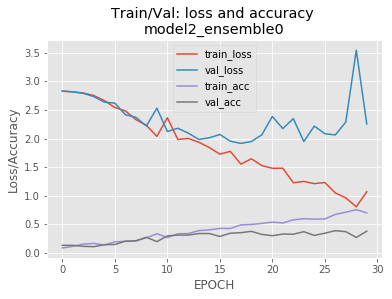

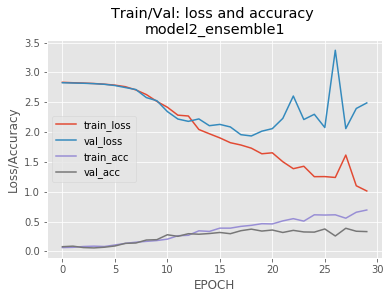

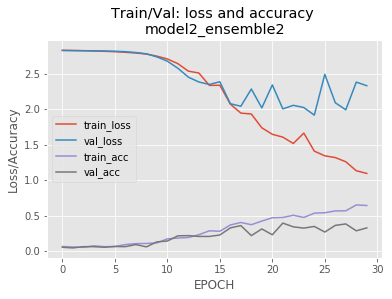

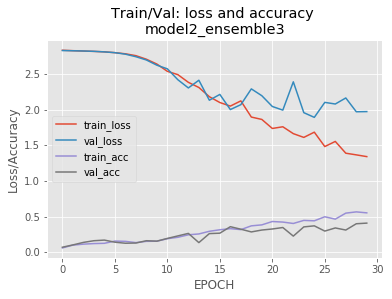

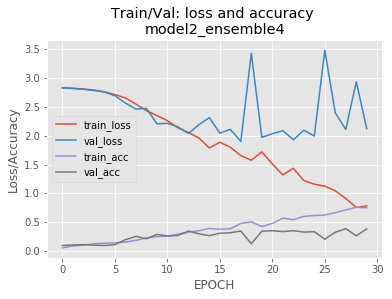

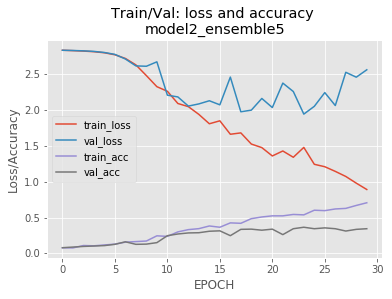

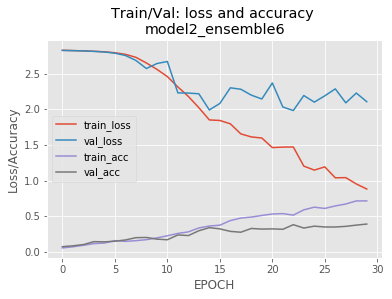

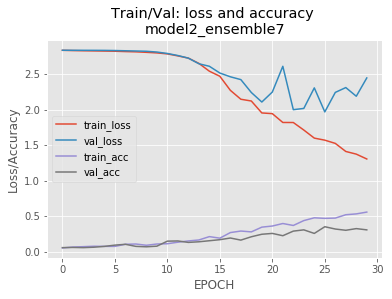

In [30]:

models = []
scores = []
for i in range(8):
    random_set_images = random.sample(range(number_of_training_images), int(number_of_training_images*0.5))
    newTrainX = trainX[random_set_images]
    newTrainY = trainY[random_set_images]
    models.append(model_1(class_label, shape))
    model_weight_file = compile_model(models[i], 'model2_ensemble'+str(i),NUM_EPOCHS=NUM_EPOCHS, trainX=newTrainX, trainY=newTrainY)
    models[i].load_weights(model_weight_file)
    result = evaluate_model(models[i])
    scores.append(result)
    
ensembleScore = ensemble_predict(models)